In [2]:
from pathlib import Path 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [140]:
def get_CVs(cut_string_start=10, cut_string_end=-6):
    directory_path = Path.cwd()

    # Create a dictionary to store each CV as a pandas dataframe
    all_exps = {}    
    # Iterate over each file in the directory
    for file_path in directory_path.iterdir():
        if file_path.is_file() and file_path.stat().st_size > 0:  # Check if file is not empty
            # Read the file
            df_temp = pd.read_csv(
                file_path,
                delimiter="\t",
                skiprows=58,
                encoding='ISO-8859-1',
                header=0,
                dtype=None,
            )         
            name_temp = file_path.name[cut_string_start:cut_string_end]
            # Add the data to the dictionary
            # keep only the collumns Ewe/V,<I>/mA, cycle number
            all_exps[name_temp] = df_temp

    return all_exps

data_dict=get_CVs(53,-8)

data_dict['02_CV'].columns

Index(['mode', 'ox/red', 'error', 'control changes', 'counter inc.', 'time/s',
       'control/V', 'Ewe/V', '<I>/mA', 'cycle number', '(Q-Qo)/C', 'I Range',
       'step time/s', 'P/W', 'Unnamed: 14'],
      dtype='object')

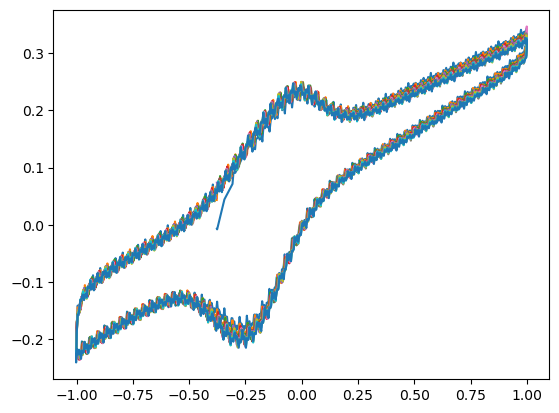

In [163]:
test_data=data_dict['02_CV']

test_data=test_data[['Ewe/V','<I>/mA', 'cycle number']]




# use groupby to extract the data for each cycle
grouped = test_data.groupby('cycle number')

# for each cycle, plot the data
for group in grouped.groups:
    cycle_data = grouped.get_group(group)
    plt.plot(cycle_data['Ewe/V'], cycle_data['<I>/mA'], label=f'Cycle {group}')